In [104]:
import pandas as pd

df = pd.read_csv('Data/overall-state-smoothed.csv')
print('how many data points:',len(df))
pd.set_option('display.max_columns', None)
df = df[['date','state_code','summed_n','smoothed_pct_cli','smoothed_pct_tested_and_positive','smoothed_pct_cli_anosmia_ageusia','smoothed_pct_contact_covid_positive']]
df['date']= pd.to_datetime(df['date']) 
df.head(15)

how many data points: 96839


,date,state_code,summed_n,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-09-16,ak,113,1.7699,NaN,4.4248,2.6549
1,2020-09-15,ak,126,1.5873,NaN,3.9683,1.5873
2,2020-09-14,ak,130,1.5385,NaN,3.8462,1.5385
3,2020-09-13,ak,126,1.6534,NaN,4.1005,1.5873
4,2020-09-12,ak,125,0.8667,NaN,3.3333,2.4000
5,2020-09-11,ak,123,0.8808,NaN,3.3875,3.2520
6,2020-09-10,ak,116,0.9339,NaN,3.5920,3.4483
7,2020-09-09,ak,112,0.9673,NaN,1.9345,3.5714
8,2020-09-08,ak,105,1.0317,NaN,3.9683,4.7619
9,2020-09-07,ak,113,0.9587,6.2340,3.6873,7.1818


In [105]:
df_NY = df.loc[df['state_code'] == 'tx']
df_NY = df_NY.sort_values(by=['date'])
# df_NY['date']= pd.to_datetime(df_NY['date'])
# df_NY = df_NY.loc[df_NY['date'] == '2020-06-25']
# df_NY["num_cliaa"] = (df_NY['smoothed_pct_cli_anosmia_ageusia']/100) * df_NY['summed_n']
# df_NY = df_NY.groupby(['date']).sum()
# df_NY["pct_cliaa"] = df_NY['num_cliaa']/df_NY['summed_n']
df_NY = df_NY.reset_index(drop=False)
df_NY.head(16)

,index,date,state_code,summed_n,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,82638,2020-04-12,tx,2651,0.9590,0.1044,1.6121,0.9070
1,83428,2020-04-12,tx,5974,0.5444,0.1870,1.4121,0.5882
2,83270,2020-04-12,tx,8293,1.2140,0.1160,2.2218,0.9309
3,83112,2020-04-12,tx,6298,1.1234,0.2698,2.5564,1.1919
4,82954,2020-04-12,tx,6376,0.8462,0.1668,1.7415,0.8807
5,82796,2020-04-12,tx,2074,0.3429,0.1261,1.0282,0.7271
6,82480,2020-04-12,tx,1651,1.3027,0.2842,2.8567,1.0299
7,82322,2020-04-12,tx,14189,1.0576,0.1943,2.2442,0.9254
8,82164,2020-04-12,tx,3900,0.6518,0.2141,1.6167,0.5149
9,82006,2020-04-12,tx,5642,1.3328,0.1209,2.5073,0.9418


In [3]:
import numpy as np
R0_est = []
pop_NY = 18804000 #this population is assumed not to change much, but what was NYC pop change during th etime period
R_days = []
infected_days = 14 #how many days can a person be part of the currently infected community
for i in range(0,len(df_NY)-infected_days):#used pct_pos here not cli
    num_cli_t = pop_NY*df_NY.loc[i, 'smoothed_pct_tested_and_positive']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_NY-num_cli_t)*df_NY.loc[i+infected_days,'smoothed_pct_tested_and_positive']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est.append(R_t)
        print(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est.append(Ave)
    pop_NY = pop_NY-num_cli_t_plus
        
last_val_known = R0_est[-1]
for i in range(infected_days+1):
    R0_est.append(last_val_known)
print(len(df_NY),len(R0_est))
df_NY.insert(2, "R0_est_pct_pos", R0_est, True)

pop_NY = 18804000
R_days = []
R0_est2 = []
for i in range(0,len(df_NY)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_NY*df_NY.loc[i, 'smoothed_pct_cli_anosmia_ageusia']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_NY-num_cli_t)*df_NY.loc[i+infected_days,'smoothed_pct_cli_anosmia_ageusia']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_NY = pop_NY-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_NY),len(R0_est2))

df_NY.insert(2, "R0_est_pct_cli_aa", R0_est2, True)
df_NY.head(3)

0.7768487907348679
0.765170717018522
0.8114199843480151
0.8552773644754822
0.7617780930494039
0.833557575544527
0.8597250903895004
158 158
158 158


,date,summed_n,R0_est_pct_cli_aa,R0_est_pct_pos,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-04-12,6500.000000,0.501224,0.776849,1.483558,1.831508,4.314217,2.904950
1,2020-04-13,6596.666667,0.493258,0.765171,1.427975,1.892350,4.068408,2.870875
2,2020-04-14,6355.666667,0.519670,0.811420,1.216125,1.902758,3.823442,2.929308


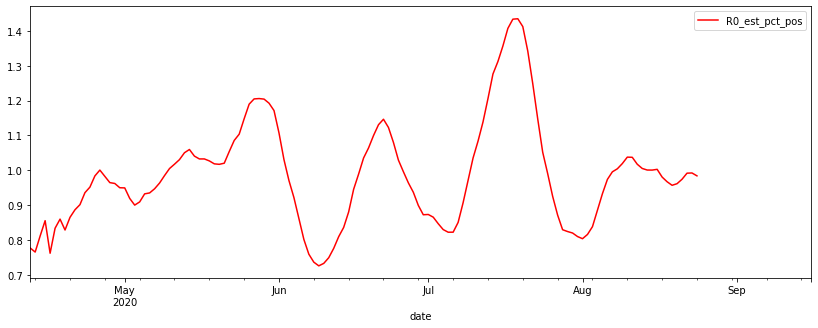

In [4]:
import matplotlib.pyplot as plt
df_NY.plot(kind='line',x='date',y='R0_est_pct_pos',color='red', figsize = (14,5))
plt.show()

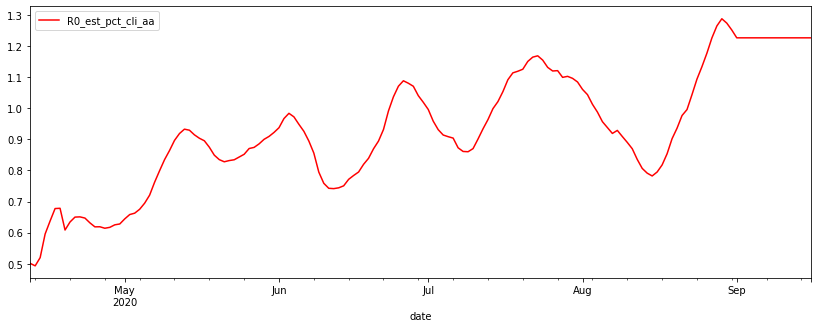

In [5]:
import matplotlib.pyplot as plt
df_NY.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='red',figsize=(14,5))
#df.plot(figsize=(7,5))
plt.show()

In [6]:
import pandas as pd

df_NewY2 = pd.read_csv("Data/NY_covid.csv", sep="/")
df_NewY = df_NewY2[['date','R']]
df_NewY['date']= pd.to_datetime(df_NewY['date'])
df_NewY = df_NewY.loc[df_NewY['date'] > '2020-04-12']
df_NewYork =  pd.merge(df_NY, df_NewY, on='date')
df_NewY2.head(3)

C:\Users\EPCOT\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,new_inf,total_inf,Hosp,0_ded,total_ded,R,IFR
1,2020-02-16,"1,158","1,158",0,0.0,0.0,3.862,1.25%
2,2020-02-17,"1,158","2,316",0,0.0,0.0,3.862,1.25%
3,2020-02-18,"1,158","3,474",0,0.0,0.0,3.862,1.25%


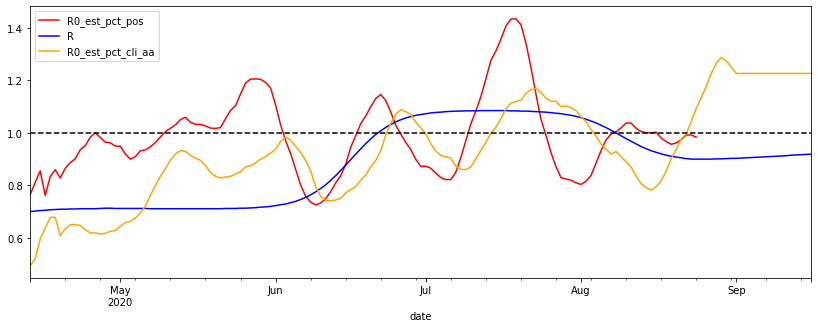

In [7]:
import matplotlib.pyplot as plt
ax = df_NewYork.plot(kind='line',x='date',y='R0_est_pct_pos',color='red', figsize=(14,5))
df_NewYork.plot(kind='line',x='date',y='R',color='blue',ax=ax)
df_NewYork.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='orange',ax=ax)
plt.axhline(y=1, color='black', linestyle='--')
#df_NewYork.plot(figsize=(7,5))
plt.show()

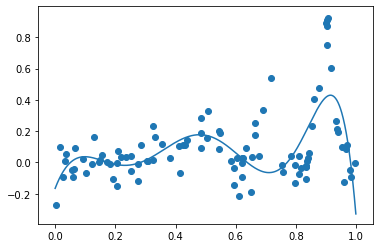

>x=0.896, f()=0.409925, actual=0.762
>x=0.618, f()=0.029978, actual=-0.097
>x=0.944, f()=0.380909, actual=0.325
>x=0.355, f()=0.076412, actual=0.034
>x=0.666, f()=-0.045738, actual=0.232
>x=0.593, f()=0.075733, actual=-0.113
>x=0.815, f()=0.144426, actual=0.093
>x=0.594, f()=0.065937, actual=-0.096
>x=0.221, f()=-0.016792, actual=0.092
>x=0.990, f()=-0.148191, actual=0.171
>x=0.537, f()=0.131523, actual=0.156
>x=0.374, f()=0.096352, actual=0.032
>x=0.141, f()=0.024612, actual=-0.013
>x=0.916, f()=0.440216, actual=0.698
>x=0.222, f()=-0.012878, actual=0.045
>x=0.179, f()=0.004381, actual=0.116
>x=0.029, f()=-0.053009, actual=-0.067
>x=0.917, f()=0.455330, actual=0.716
>x=0.953, f()=0.359856, actual=0.072
>x=0.930, f()=0.442867, actual=0.431
>x=0.885, f()=0.408035, actual=0.436
>x=0.900, f()=0.444065, actual=0.846
>x=0.089, f()=0.038403, actual=0.103
>x=0.633, f()=-0.004463, actual=-0.123
>x=0.375, f()=0.096317, actual=0.173
>x=0.214, f()=-0.004108, actual=0.011
>x=0.176, f()=0.012928, a

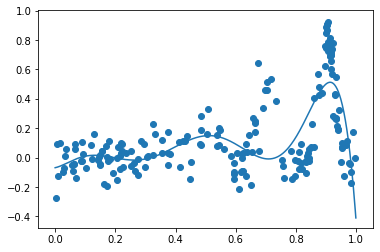

Best Result: x=0.906, y=0.921


In [2]:
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [4]:
print(objective(x))

0.7084134588046787


In [12]:
from hyperopt import hp, tpe, fmin, Trials
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return -((x**2 * sin(5 * pi * x)**6.0) + noise)
space = hp.uniform('x', 0,1)
# Create a trials object
tpe_trials = Trials()
# Create the algorithm
tpe_algo = tpe.suggest
# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, 
                algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000)

print(tpe_best)

100%|█████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.29trial/s, best loss: -1.0703520414952705]
{'x': 0.9011482401273166}


In [69]:
df_CA = df.loc[df['state_code'] == 'ca']
df_CA = df_CA.sort_values(by=['date'])
df_CA = df_CA.groupby(['date']).mean()
df_CA = df_CA.reset_index(drop=False)
#df_CA.head(16)
infected_days = 14
pop_CA = 39000000
R_days = []
R0_est2 = []
for i in range(0,len(df_CA)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_CA*df_CA.loc[i, 'smoothed_pct_cli_anosmia_ageusia']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_CA-num_cli_t)*df_CA.loc[i+infected_days,'smoothed_pct_cli_anosmia_ageusia']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_CA = pop_CA-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_CA),len(R0_est2))

df_CA.insert(2, "R0_est_pct_cli_aa", R0_est2, True)
df_CA.head(90)

158 158


,date,summed_n,R0_est_pct_cli_aa,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-04-12,6765.000000,0.784056,0.723050,0.351067,1.753125,0.676425
1,2020-04-13,6773.333333,0.820061,0.674175,0.352175,1.655592,0.709900
2,2020-04-14,7361.666667,0.874286,0.675475,0.278525,1.557533,0.747342
3,2020-04-15,7333.666667,0.915402,0.596983,0.293017,1.490067,0.766950
4,2020-04-16,7625.333333,0.867241,0.630092,0.235050,1.541250,0.773792
...,...,...,...,...,...,...,...
85,2020-07-06,12521.333333,1.036440,0.597842,1.804075,1.641858,2.264350
86,2020-07-07,12725.333333,1.028588,0.539542,1.755517,1.585867,2.333575
87,2020-07-08,12939.000000,1.017860,0.534325,1.721867,1.631675,2.344233
88,2020-07-09,12987.666667,1.001379,0.549200,1.780658,1.644742,2.355083


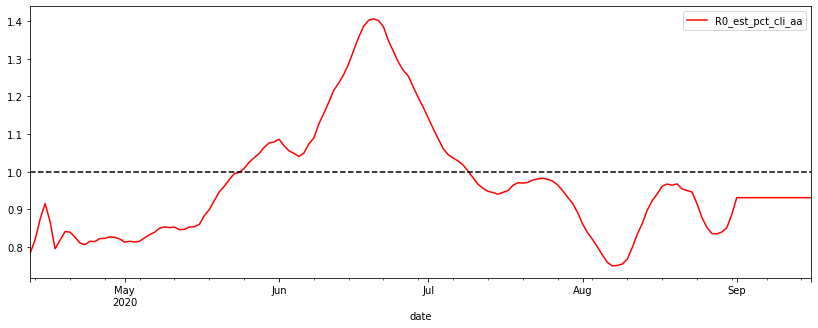

In [60]:
import matplotlib.pyplot as plt
ax = df_CA.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='red', figsize=(14,5))
plt.axhline(y=1, color='black', linestyle='--')
#df_NewYork.plot(figsize=(7,5))
plt.show()

In [70]:
df_FL = df.loc[df['state_code'] == 'fl']
df_FL = df_FL.sort_values(by=['date'])
df_FL = df_FL.groupby(['date']).mean()
df_FL = df_FL.reset_index(drop=False)
#df_FL.head(16)
infected_days = 14
pop_FL = 21480000
R_days = []
R0_est2 = []
for i in range(0,len(df_FL)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_FL*df_FL.loc[i, 'smoothed_pct_cli_anosmia_ageusia']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_FL-num_cli_t)*df_FL.loc[i+infected_days,'smoothed_pct_cli_anosmia_ageusia']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_FL = pop_FL-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_FL),len(R0_est2))

df_FL.insert(2, "R0_est_pct_cli_aa", R0_est2, True)
df_FL.head(90)

158 158


,date,summed_n,R0_est_pct_cli_aa,smoothed_pct_cli,smoothed_pct_tested_and_positive,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_contact_covid_positive
0,2020-04-12,8228.666667,0.976432,0.760775,0.234617,1.762192,0.882917
1,2020-04-13,8328.000000,0.993531,0.725550,0.305542,1.711042,0.896350
2,2020-04-14,8233.000000,0.990664,0.695108,0.289208,1.727258,0.916508
3,2020-04-15,7546.666667,0.941124,0.685750,0.323342,1.725358,0.859400
4,2020-04-16,7020.000000,0.998828,0.630108,0.285200,1.612283,0.876550
...,...,...,...,...,...,...,...
85,2020-07-06,10160.000000,1.014329,1.032292,2.597125,2.856408,3.328683
86,2020-07-07,10313.000000,0.989209,0.985942,2.724442,2.889883,3.445108
87,2020-07-08,10565.666667,0.957135,0.964025,2.936517,2.933517,3.633200
88,2020-07-09,10618.000000,0.923747,0.970450,3.027142,2.943100,3.809108


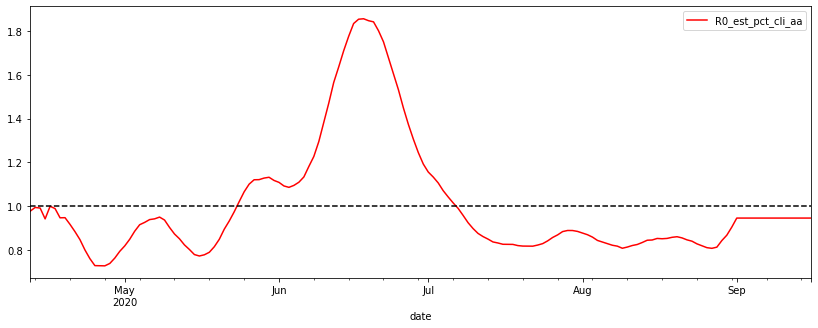

In [62]:
import matplotlib.pyplot as plt
ax = df_FL.plot(kind='line',x='date',y='R0_est_pct_cli_aa',color='red', figsize=(14,5))
plt.axhline(y=1, color='black', linestyle='--')
#df_NewYork.plot(figsize=(7,5))
plt.show()

In [8]:
df_CA = df.loc[df['state_code'] == 'ca']
df_CA = df_CA.sort_values(by=['date'])
df_CA = df_CA.groupby(['date']).mean()
df_CA = df_CA.reset_index(drop=False)
#df_CA.head(16)
infected_days = 14
pop_CA = 39000000
R_days = []
R0_est2 = []
for i in range(0,len(df_CA)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_CA*df_CA.loc[i, 'smoothed_pct_tested_and_positive']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_CA-num_cli_t)*df_CA.loc[i+infected_days,'smoothed_pct_tested_and_positive']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_CA = pop_CA-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_CA),len(R0_est2))

df_CA.insert(2, "R0_est_pct_pos", R0_est2, True)

158 158


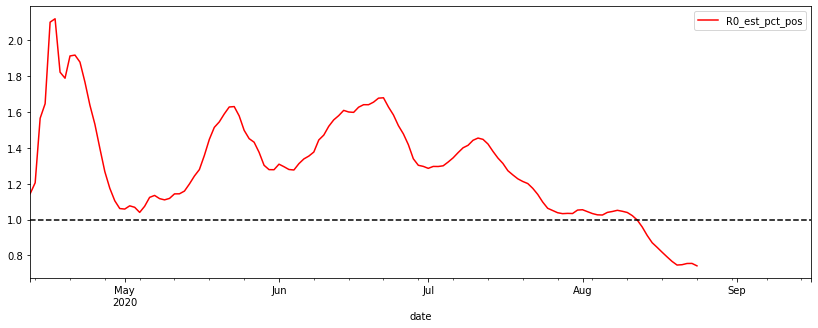

In [9]:
import matplotlib.pyplot as plt
ax = df_CA.plot(kind='line',x='date',y='R0_est_pct_pos',color='red', figsize=(14,5))
plt.axhline(y=1, color='black', linestyle='--')
#df_NewYork.plot(figsize=(7,5))
plt.show()

158 158


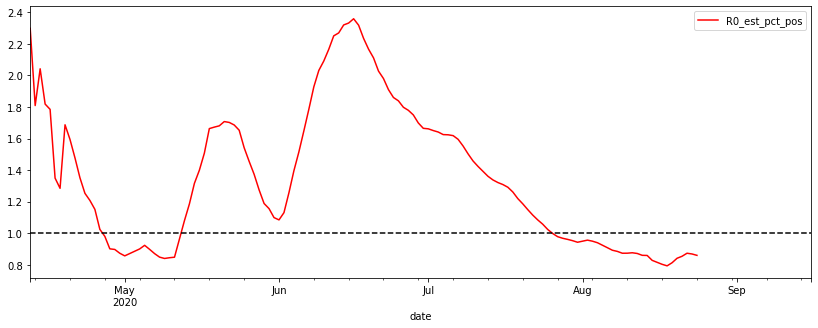

In [10]:
df_FL = df.loc[df['state_code'] == 'fl']
df_FL = df_FL.sort_values(by=['date'])
df_FL = df_FL.groupby(['date']).mean()
df_FL = df_FL.reset_index(drop=False)
#df_FL.head(16)
infected_days = 14
pop_FL = 21480000
R_days = []
R0_est2 = []
for i in range(0,len(df_FL)-infected_days):#used cli here
#for i in range(0,3):
    num_cli_t = pop_FL*df_FL.loc[i, 'smoothed_pct_tested_and_positive']/100#is test_pos just for this time period or a cum total
    num_cli_t_plus = (pop_FL-num_cli_t)*df_FL.loc[i+infected_days,'smoothed_pct_tested_and_positive']/100
    R_t = num_cli_t_plus/num_cli_t
    if i < 7:
        R_days.append(R_t)
        R0_est2.append(R_t)
    if i > 7:
        R_days = [R_days[1],R_days[2],R_days[3],R_days[4],R_days[5],R_days[6],R_t]
        Ave = np.mean(np.array(R_days))
        R0_est2.append(Ave)
    pop_FL = pop_FL-num_cli_t_plus
    
last_val_known = R0_est2[-1]
for i in range(infected_days+1):
    R0_est2.append(last_val_known)
print(len(df_FL),len(R0_est2))

df_FL.insert(2, "R0_est_pct_pos", R0_est2, True)
ax = df_FL.plot(kind='line',x='date',y='R0_est_pct_pos',color='red', figsize=(14,5))
plt.axhline(y=1, color='black', linestyle='--')
#df_NewYork.plot(figsize=(7,5))
plt.show()

In [61]:
import numpy as np
d = np.zeros((16,72))  # matrix size (equations, number of variables)
np.save('covidMatrix',d)
#creating matrix once before editing


In [95]:
Mat = np.load('covidMatrix.npy') #import the array
dfP = pd.read_csv('Probcovid.csv') #import the probability file
# STEP 1 change to fit the joint probability

# 0.4(Pr(x1,x2,x3,0,1)) -- 0.6 Pr(x1,x2,x3,0,1)  - 0.4 Pr(x1,x2,x3,0,0) = 0
#dfP = dfP.loc[dfP['M'] == 1]
#dfP = dfP.loc[dfP['A'] == ]
#dfP = dfP.loc[dfP['R'] == 1]
dfP = dfP.loc[dfP['L'] == 0]
dfP = dfP.loc[dfP['Cliaa'] == 0]

LISTV = list(dfP.index.values)
for item in LISTV:
    #STEP 2 change first num in [equation # -1 ,] for eq ur on and what value they are
    Mat[0,item] = -0.4
    
    
print(Mat[0,9])
# np.save('covidMatrix',Mat)

0.956


In [96]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(Mat)

[[-0.044  -0.044  -0.044   0.      0.      0.      0.      0.      0.
   0.956   0.956   0.956   0.      0.      0.      0.      0.      0.
  -0.044  -0.044  -0.044   0.      0.      0.      0.      0.      0.
  -0.044  -0.044  -0.044   0.      0.      0.      0.      0.      0.
   0.956   0.956   0.956   0.      0.      0.      0.      0.      0.
   0.956   0.956   0.956   0.      0.      0.      0.      0.      0.
   0.956   0.956   0.956   0.      0.      0.      0.      0.      0.
  -0.044  -0.044  -0.044   0.      0.      0.      0.      0.      0.    ]
 [ 1.      1.      1.      0.      0.      0.      0.      0.      0.
   1.      1.      1.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.      1.      1.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.      1.      1.      0.      0.      0.      0.      0.      0.
   0.      0.  

In [101]:
df_Mat = pd.DataFrame(Mat)
df_Mat.head()
df_Mat.to_csv('CovidMatT0Sep30.csv', index=False)